# Regressione (Lineare)

La **regressione** è uno strumento statistico fondamentale per modellare la relazione tra una **variabile dipendente** e una o più **variabili indipendenti**. È ampiamente utilizzata in data science e machine learning per prevedere risultati e comprendere le relazioni tra variabili.

## Cos'è la regressione?
La regressione analizza la relazione tra variabili. Ad esempio, può aiutare a capire come lo stipendio di un dipendente dipenda da esperienza, educazione, ruolo e città.
In generale, si parte da osservazioni che descrivono un fenomeno di interesse e si cerca di trovare una funzione che mappi le **variabili indipendenti** (input o *predictors*) sulla **variabile dipendente** (output o *response*).

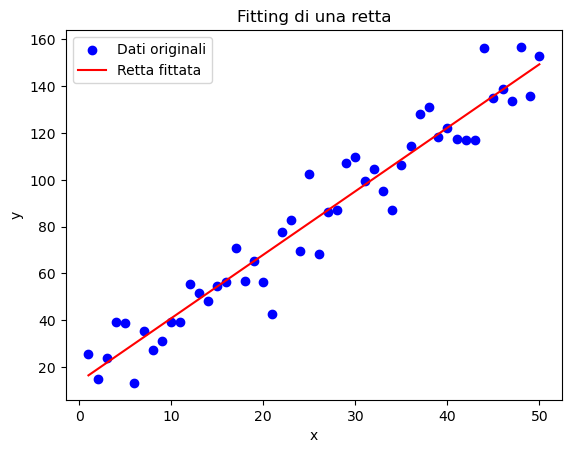

### Quando usare la regressione?
- Capire se e come un fattore influenza un altro
- Prevedere valori futuri con nuovi input
- Ambiti: economia, scienze sociali, informatica, etc.

## Regressione Lineare
Una regressione è lineare se il modello è una combinazione lineare dei parametri. È una delle tecniche più semplici e diffuse. L'equazione generale è:

$y = \beta_0 + \beta_1x_1 + \times + \beta_rx_r$

Dove:
- $\beta_0, ..., \beta_r$ sono i coefficienti

L'obiettivo è stimare i coefficienti $b_0, ..,b_r$ minimizzando la somma dei quadrati dei residui (SSR):

SSR = $\sum_i(y_i -f(x_i))^2$

## Valutazione delle prestazioni
Il coefficiente di determinazione 𝑅² indica quanto bene il modello spiega la variabilità di 𝑦. Un 𝑅² = 1 rappresenta una perfetta aderenza ai dati.




## Regressione Lineare Semplice

Con una sola variabile indipendente: $f(x)=b_0 + b_1x$

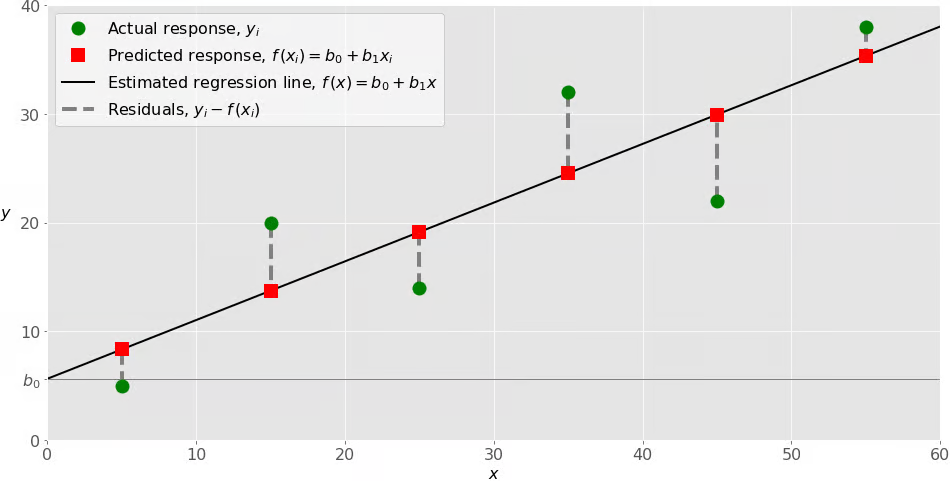



## Regressione Lineare Multipla
Con due o più variabili indipendenti: $f(x_1, ..., x_r) = b_0 + b_1x_1 + ⋯ + b_rx_r$

## Regressione Polinomiale
Un caso generalizzato in cui si includono termini non lineari come $x^2, x_1x_2$, ecc

## Regressione non lineare
Quando il modello non è lineare nei parametri come ad esempio $y = a * exp(b * x)$

## Underfitting e Overfitting
- **Underfitting**: si verifica quando un modello non riesce a catturare accuratamente le dipendenze nei dati, solitamente a causa della sua eccessiva semplicità. 
- **Overfitting**: accade quando un modello apprende sia le dipendenze che le fluttuazioni casuali nei dati. In altre parole, il modello impara troppo bene i dati disponibili. I modelli complessi, con molte caratteristiche o termini, sono spesso soggetti all’overfitting

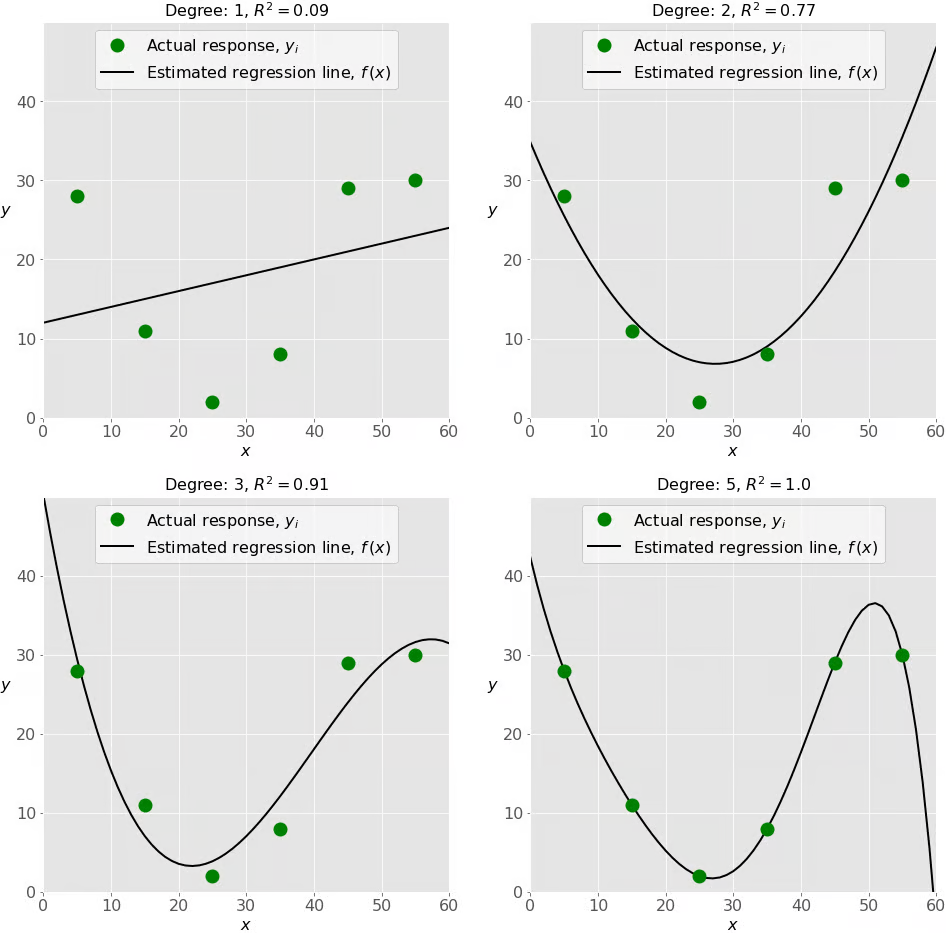

l coefficiente di determinazione, indicato con 𝑅² (R-quadro), è una misura statistica che indica quanto bene un modello di regressione spiega la variabilità dei dati osservati.

$$R = 1 - \frac{SSR}{SST}$$

- $SSR = \sum_i{(y_i - f(x_i))^2}$
- $SST =  \sum_i{(y_i - \hat{y})^2}$
- $\hat{y}$ media dei valori

In parole semplici:

𝑅² = 1: il modello spiega perfettamente i dati.

𝑅² = 0: il modello non spiega per niente la variabilità dei dati.

𝑅² < 0: il modello è peggiore di una semplice media costante.

### MAE e RMSE

Il **MAE (Mean Absolute Error)** misura l'errore medio assoluto tra i valori predetti e i valori reali.

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

- Interpretabile direttamente nella stessa unità della variabile target.
- Valori più bassi indicano migliori prestazioni.
- Meno sensibile agli outlier rispetto ad altri errori.

---

Il **RMSE  (Root Mean Squared Error)** è la radice quadrata dell’errore quadratico medio:

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 }
$$

- Penalizza di più gli errori grandi rispetto al MAE.
- Molto usato quando vuoi dare peso maggiore agli errori grossi.
- Valori più bassi indicano un modello più preciso.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math

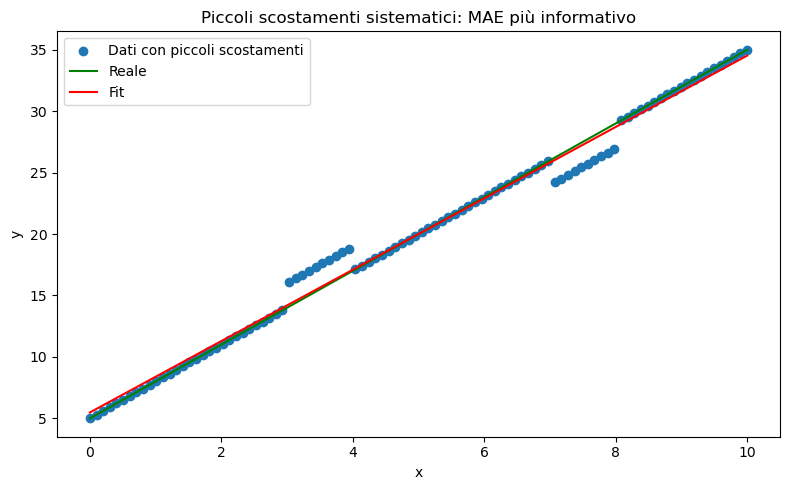

r2: 0.9900203451807922 
mae: 0.5632163173937156 
rmse: 0.8504071490950217


In [2]:
# Simuliamo dati quasi perfetti tranne alcuni piccoli scostamenti sistematici
np.random.seed(42)
x = np.linspace(0, 10, 100)
y_true = 3 * x + 5 
y = y_true.copy()

# Introduciamo piccoli errori sistematici in alcune parti
y[30:40] += 2  # scostamento costante
y[70:80] -= 2

# Modello lineare
def lineare(x, a, b):
    return a * x + b

# Fit
popt, _ = sp.optimize.curve_fit(lineare, x, y)
y_pred = lineare(x, *popt)

# Metriche
mae = np.mean(np.abs(y - y_pred))
rmse = np.sqrt(np.mean((y - y_pred)**2))
ss_tot = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y - y_pred)**2)
r2 = 1 - ss_res / ss_tot

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Dati con piccoli scostamenti')
plt.plot(x, y_true, label='Reale', color='green')
plt.plot(x, y_pred, label='Fit', color='red')
plt.legend()
plt.title('Piccoli scostamenti sistematici: MAE più informativo')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

print('r2:',r2, '\nmae:',mae, '\nrmse:',rmse)


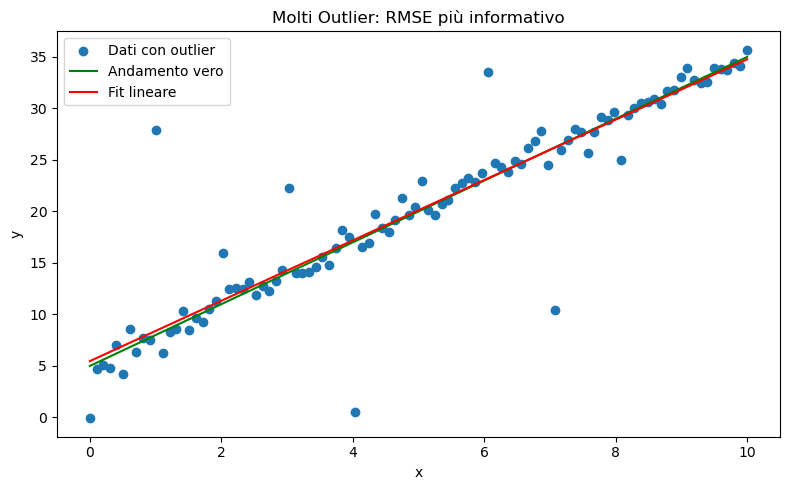

r2: 0.8554453917360909 
mae: 1.5563149605397024 
rmse: 3.5119704590190413


In [3]:
# Genera dati con rumore e outlier
np.random.seed(1)
x = np.linspace(0, 10, 100)
y_true = 3 * x + 5 
y = y_true + np.random.normal(scale=1.0, size=len(x))

# Aggiungiamo alcuni outlier
y[::10] += np.random.normal(scale=15.0, size=len(y[::10]))

# Modello lineare
def lineare(x, a, b):
    return a * x + b

# Fit
popt, _ = sp.optimize.curve_fit(lineare, x, y)
y_pred = lineare(x, *popt)

# Metriche
mae = np.mean(np.abs(y - y_pred))
rmse = np.sqrt(np.mean((y - y_pred)**2))
ss_tot = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y - y_pred)**2)
r2 = 1 - ss_res / ss_tot

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Dati con outlier')
plt.plot(x, y_true, label='Andamento vero', color='green')
plt.plot(x, y_pred, label='Fit lineare', color='red')
plt.legend()
plt.title('Molti Outlier: RMSE più informativo')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

print('r2:',r2, '\nmae:',mae, '\nrmse:',rmse)


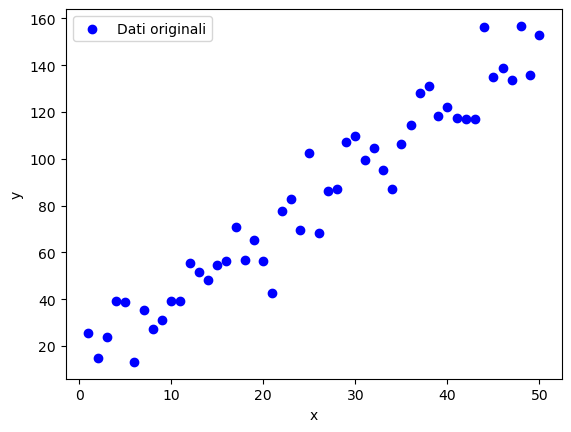

In [4]:
# Generazione dataset 
np.random.seed(0)

# ESEMPIO: dati quasi lineari con rumore
x = np.linspace(1, 50, 50)
y_true = 3 * x + 5 
y = y_true + np.random.normal(0, 10, size=len(x))  # y = 3x + 5 + rumore

# Plot
plt.scatter(x, y, label="Dati originali", color="blue")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Regressione lineare: vediamo come calcolare "a mano" m e q

Dato un insieme di punti $ (x_1, y_1), (x_2, y_2), \dots, (x_n, y_n) $, vogliamo trovare la retta dei minimi quadrati:

$$
y = m x + q
$$

dove:

- $ m $ è il **coefficiente angolare**, descrive **quanto y cambia** al variare di x (pendenza)
- $ q $ è l'**intercetta**, rappresenta il valore di y quando $x = 0$


Cerchiamo quindi m e q che minimizzano la **somma degli errori quadrati**:

$$
S(m, q) = \sum_{i=1}^{n} (y_i - (mx_i + q))^2
$$

Come minimizzo? Calcolo le derivate parziali rispetto ad m e q e e le pongo uguali a zero, questo mi porta al sistema di equazioni lineari:

$$
m = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 - \left( \sum x_i \right)^2}
$$

$$
q = \frac{\sum y_i - m \sum x_i}{n}
$$

In [5]:
# --- Calcoliamo "a mano" la retta di regressione lineare ---

def fit_line(x, y):
    """
    Calcola il fitting lineare dei dati su una retta y = mx + q.
    """
    if len(x) != len(y):
        raise ValueError("Le liste x e y devono avere la stessa lunghezza.")
    if len(x) < 2:
        raise ValueError("Sono necessari almeno due punti per calcolare una retta.")
    
    N = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(x[i] * y[i] for i in range(N))
    sum_x_squared = sum(x[i] ** 2 for i in range(N))

    m = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x ** 2)
    q = (sum_y - m * sum_x) / N
    return m, q

def predict(x_val, m, q):
    """
    Predice il valore y usando una retta y = mx + q.
    """
    return m * x_val + q

Coefficiente angolare (m): 2.711913776940778
Intercetta (q): 13.751791411141157


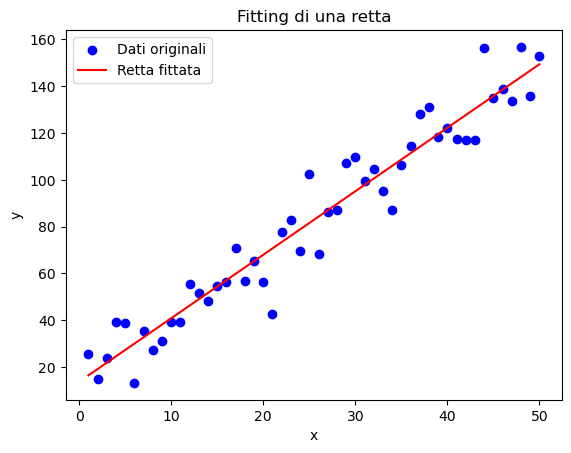

In [6]:
# Fitting della retta
m, q = fit_line(x, y) 

# Predizione dei valori fittati
retta_pred = [predict(i, m, q) for i in x]

# Output dei parametri della retta
print(f"Coefficiente angolare (m): {m}")
print(f"Intercetta (q): {q}")

# Plot
plt.scatter(x, y, label="Dati originali", color="blue")
plt.plot(x, retta_pred, label="Retta fittata", color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fitting di una retta")
plt.show()

Coefficiente angolare (m): 2.711913776940777
Intercetta (q): 13.751791411141072


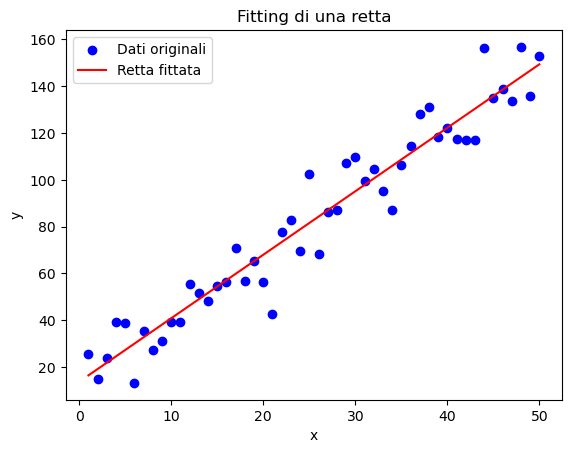

In [11]:
# Fitting della retta
m, q = np.polyfit(x, y, 1)  # Grado 1 per una retta

# Predizione dei valori fittati
y_fit_np = m * x + q

# Output dei parametri della retta
print(f"Coefficiente angolare (m): {m}")
print(f"Intercetta (q): {q}")

# Plot
plt.scatter(x, y, label="Dati originali", color="blue")
plt.plot(x, y_fit_np, label="Retta fittata", color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fitting di una retta")
plt.show()


In [7]:
# Fitting con scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(x, y)

# Predizione dei valori fittati
y_fit_sp = slope * x + intercept

# Output dei parametri
print(f"Coefficiente angolare (m): {slope}")
print(f"Intercetta (q): {intercept}")
print(f"R-quadro: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Errore standard: {std_err}")

Coefficiente angolare (m): 2.711913776940778
Intercetta (q): 13.751791411141141
R-quadro: 0.933333949407872
P-value: 7.032897227436171e-30
Errore standard: 0.10461382724296826


#### `p_value`
- Indica la significatività statistica del coefficiente angolare (slope).
- Valori piccoli (es. **< 0.05**) indicano che la relazione è **statisticamente significativa**.
- Esempio: `p ≈ 3.37e-11` → relazione altamente significativa.

#### `std_err` (Errore standard del coefficiente)
- Indica l’incertezza nella stima del coefficiente angolare.
- Più piccolo → stima più precisa.
- Esempio: `std_err ≈ 1.26` → buona affidabilità della pendenza stimata.


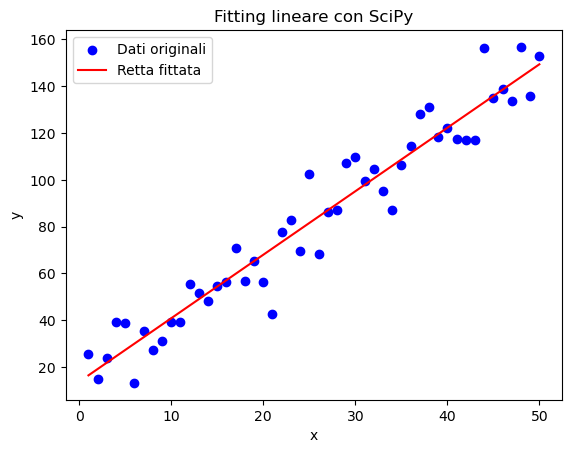

In [31]:
# Plot
plt.scatter(x, y, label="Dati originali", color="blue")
plt.plot(x, y_fit_sp, label="Retta fittata", color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fitting lineare con SciPy")
plt.show()


In [8]:
def calculate_rmse(y_real, y_pred):
    if len(y_real) != len(y_pred):
        raise ValueError("Le liste devono avere la stessa lunghezza.")
    mse = sum((y_real[i] - y_pred[i]) ** 2 for i in range(len(y_real))) / len(y_real)
    return math.sqrt(mse)

def calculate_mae(y_real, y_pred):
    if len(y_real) != len(y_pred):
        raise ValueError("Le liste devono avere la stessa lunghezza.")
    errors = [abs(y_real[i] - y_pred[i]) for i in range(len(y_real))]
    return sum(errors) / len(errors)

In [12]:
# MAE e RMSE per lineare (NumPy)
mae_n = calculate_mae(y, y_fit_np)
rmse_n = calculate_rmse(y, y_fit_np)

# MAE e RMSE per log-model (SciPy)
mae_s = calculate_mae(y, y_fit_sp)
rmse_s = calculate_rmse(y, y_fit_sp)


{
    "MAE lineare (SciPy)": mae_s,
    "RMSE lineare(SciPy)": rmse_s,
    "MAE lineare (NumPy)": mae_n,
    "RMSE lineare (NumPy)": rmse_n
}



{'MAE lineare (SciPy)': np.float64(8.07131548592103),
 'RMSE lineare(SciPy)': 10.459290238482444,
 'MAE lineare (NumPy)': np.float64(8.071315485921023),
 'RMSE lineare (NumPy)': 10.459290238482444}

Coefficiente angolare (m): 1.0383927637865593
Intercetta (q): -4.838893183706744
Intercetta (q): 104.48751570507036


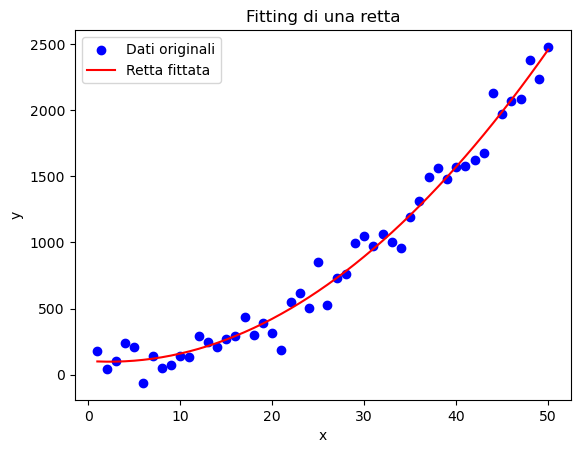

In [13]:
# Generazione dataset quadratico
np.random.seed(0)

# ESEMPIO 1: dati quadratici lineari con rumore
x = np.linspace(1, 50, 50)
y = x**2 + np.random.normal(0, 100, size=x.shape)  # y = x2 + rumore

# Fitting della retta
a, b, c = np.polyfit(x, y, 2)  # Grado 2 per una retta

# Predizione dei valori fittati
y_fit_q_np = a * x**2  + b * x + c

# Output dei parametri della retta
print(f"Coefficiente angolare (m): {a}")
print(f"Intercetta (q): {b}")
print(f"Intercetta (q): {c}")

# Plot
plt.scatter(x, y, label="Dati originali", color="blue")
plt.plot(x, y_fit_q_np, label="Retta fittata", color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fitting di una retta")
plt.show()

Parametro a (x²): 1.0383927637865595
Parametro b (x): -4.838893183706758
Parametro c (intercetta): 104.48751570507076


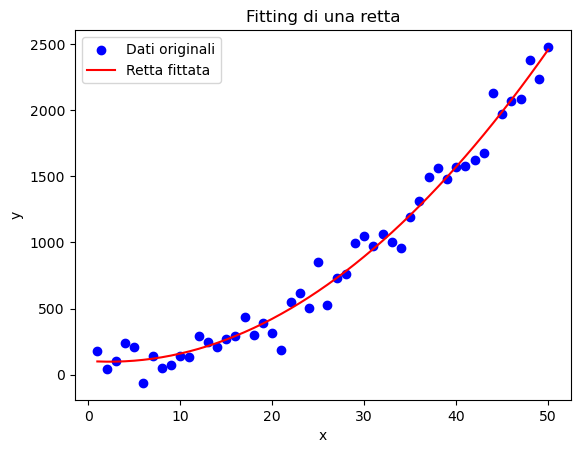

In [15]:
# Generazione di due dataset realistici: uno quasi lineare, uno quasi quadratico
np.random.seed(0)

# ESEMPIO 1: dati quadratici con rumore
x = np.linspace(1, 50, 50)
y = x**2 + np.random.normal(0, 100, size=x.shape)  # y = x2 + rumore

# Definizione del modello quadratico
def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

# Fit con SciPy
params, _ = sp.optimize.curve_fit(quadratic, x, y)
a, b, c = params

# Predizioni
y_fit_q_sp = quadratic(x, a, b, c)
# Output dei parametri
print(f"Parametro a (x²): {a}")
print(f"Parametro b (x): {b}")
print(f"Parametro c (intercetta): {c}")

# Plot
plt.scatter(x, y, label="Dati originali", color="blue")
plt.plot(x, y_fit_q_sp, label="Retta fittata", color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fitting di una retta")
plt.show()

In [16]:
# MAE e RMSE per lineare (NumPy)
mae_n = calculate_mae(y, y_fit_q_np)
rmse_n = calculate_rmse(y, y_fit_q_np)

# MAE e RMSE per log-model (SciPy)
mae_s = calculate_mae(y, y_fit_q_sp)
rmse_s = calculate_rmse(y, y_fit_q_sp)


{
    "MAE polinomiale  (SciPy)": mae_s,
    "RMSE polinomiale   (SciPy)": rmse_s,
    "MAE polinomiale (NumPy)": mae_n,
    "RMSE polinomiale  (NumPy)": rmse_n
}

{'MAE polinomiale  (SciPy)': np.float64(80.59968274869804),
 'RMSE polinomiale   (SciPy)': 104.34843962746773,
 'MAE polinomiale (NumPy)': np.float64(80.59968274869807),
 'RMSE polinomiale  (NumPy)': 104.34843962746774}

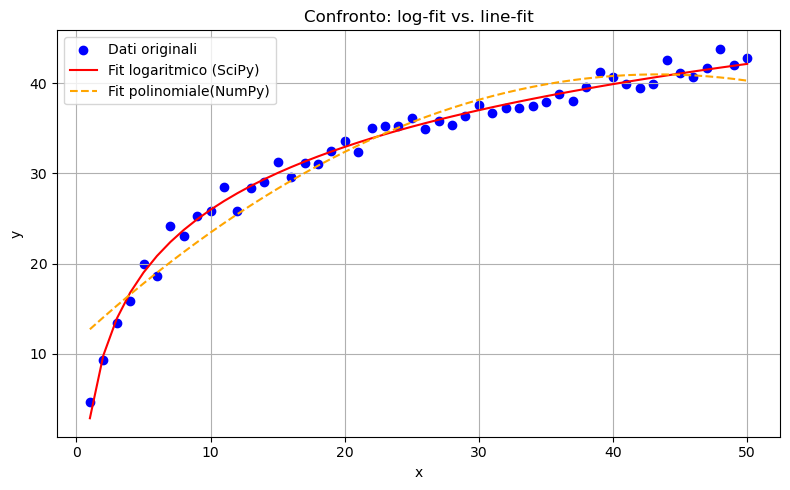

{'a (coeff. log x)': np.float64(10.04429188050525),
 'b (intercetta)': np.float64(2.842957958853825)}

In [18]:
# Generazione dati logaritmici + rumore
np.random.seed(1)
x = np.linspace(1, 50, 50)
y = 10 * np.log(x) + 3 + np.random.normal(0, 1, size=x.shape)  # y = 10*log(x) + 3 + rumore

# Definizione del modello logaritmico
def log_model(x, a, b):
    return a * np.log(x) + b

# Fit con SciPy
params, _ = sp.optimize.curve_fit(log_model, x, y)
a, b = params

# Predizione
y_fit = log_model(x, a, b)

# Proviamo a fittare con numpy usando un finto modello lineare su x, non su log(x)
coeffs_poly = np.polyfit(x, y, 2) 
y_polyfit = np.polyval(coeffs_poly, x)

# Plot confronto
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Dati originali", color="blue")
plt.plot(x, y_fit, label="Fit logaritmico (SciPy)", color="red")
plt.plot(x, y_polyfit, label="Fit polinomiale(NumPy)", color="orange", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Confronto: log-fit vs. line-fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Coefficienti NumPy
{
    "NumPy polyfit - coeff m": coeffs_poly[0],
    "NumPy polyfit - coeff q": coeffs_poly[1]
}
# Output dei parametri
{
    "a (coeff. log x)": a,
    "b (intercetta)": b
}


In [19]:
# MAE e RMSE per log-model (SciPy)
mae_log = calculate_mae(y, y_fit)
rmse_log = calculate_rmse(y, y_fit)

# MAE e RMSE per lineare (NumPy)
mae_lin = calculate_mae(y, y_polyfit)
rmse_lin = calculate_rmse(y, y_polyfit)

{
    "MAE log (SciPy)": mae_log,
    "RMSE log (SciPy)": rmse_log,
    "MAE polinomiale (NumPy)": mae_lin,
    "RMSE polinomiale  (NumPy)": rmse_lin
}

{'MAE log (SciPy)': np.float64(0.7861232887607632),
 'RMSE log (SciPy)': 0.9688051477787331,
 'MAE polinomiale (NumPy)': np.float64(1.6341984133912606),
 'RMSE polinomiale  (NumPy)': 2.140110122060235}

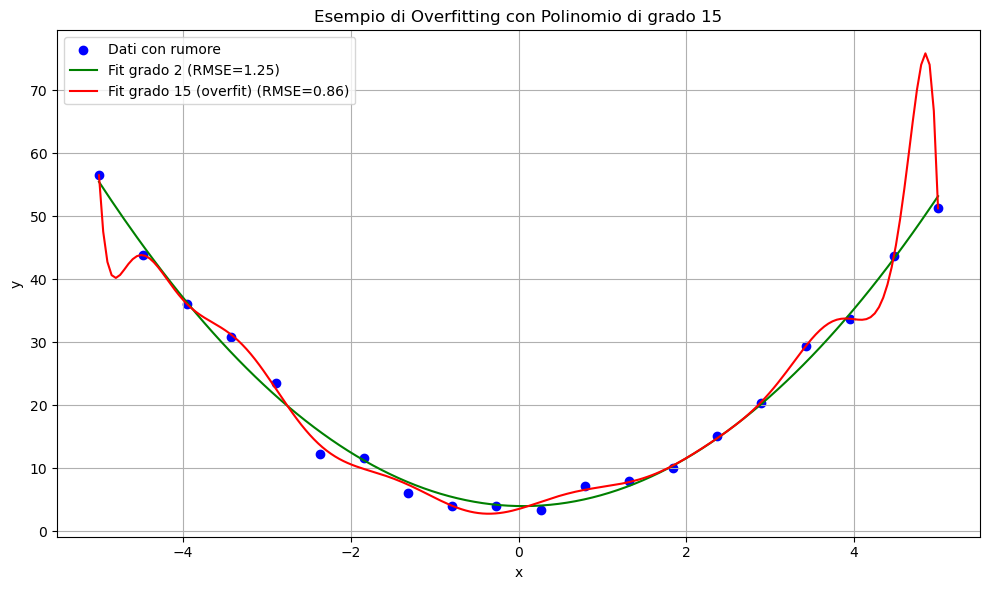

{'RMSE grado 2': np.float64(1.2450430429053698),
 'RMSE grado 15': np.float64(0.8618168069283998)}

In [20]:
# Generazione di dati con rumore (andamento reale: parabola)
np.random.seed(0)
x = np.linspace(-5, 5, 20)
y_true = 2 * x**2 + 3
y = y_true + np.random.normal(0, 2, size=x.shape)

# Fit di modelli polinomiali di grado 2 (buono) e 15 (overfitting)
coeffs_deg2 = np.polyfit(x, y, deg=2)
coeffs_deg15 = np.polyfit(x, y, deg=15)

poly_deg2 = np.poly1d(coeffs_deg2)
poly_deg15 = np.poly1d(coeffs_deg15)

# Griglia fine per valutazione
x_fit = np.linspace(-5, 5, 200)
y_fit_deg2 = poly_deg2(x_fit)
y_fit_deg15 = poly_deg15(x_fit)

# Errori sul training set
y_pred_deg2 = poly_deg2(x)
y_pred_deg15 = poly_deg15(x)

rmse_deg2 = np.sqrt(calculate_rmse(y, y_pred_deg2))
rmse_deg15 = np.sqrt(calculate_rmse(y, y_pred_deg15))

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Dati con rumore", color='blue')
plt.plot(x_fit, y_fit_deg2, label=f"Fit grado 2 (RMSE={rmse_deg2:.2f})", color='green')
plt.plot(x_fit, y_fit_deg15, label=f"Fit grado 15 (overfit) (RMSE={rmse_deg15:.2f})", color='red')
plt.title("Esempio di Overfitting con Polinomio di grado 15")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Output errori
{
    "RMSE grado 2": rmse_deg2,
    "RMSE grado 15": rmse_deg15
}


/var/folders/98/2lfxkvhx40ldhrbg5c0920400000gp/T/ipykernel_91060/4237455805.py:10: RankWarning: Polyfit may be poorly conditioned
  coeffs_deg15_train_m = np.polyfit(x_train_manual, y_train_manual, deg=15)


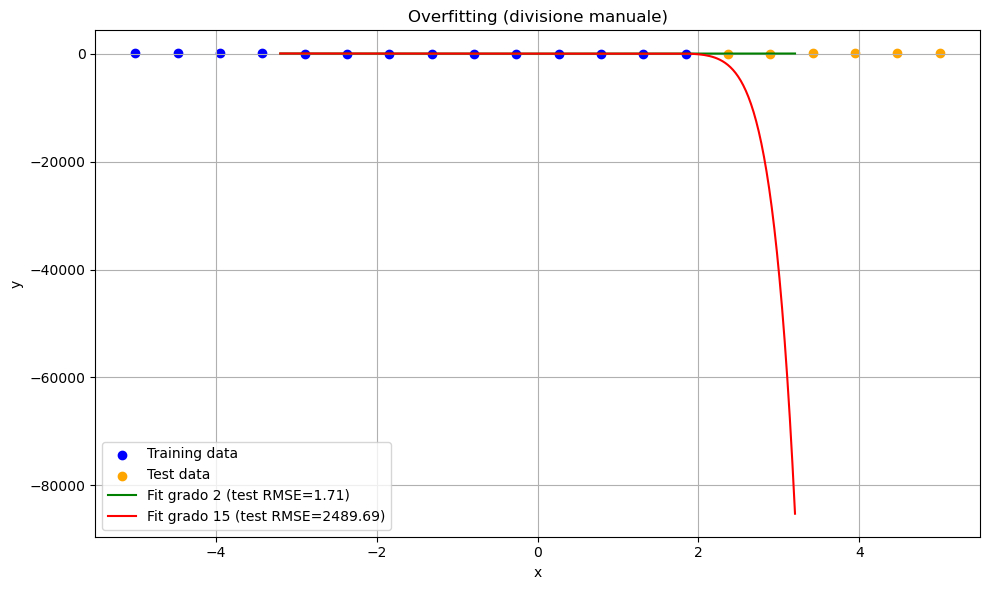

{'Test RMSE grado 2': np.float64(1.7080960126491735),
 'Test RMSE grado 15': np.float64(2489.694024414013)}

In [21]:
# Divisione manuale dei dati in training (70%) e test (30%)
split_index = int(len(x) * 0.7)
x_train_manual = x[:split_index]
y_train_manual = y[:split_index]
x_test_manual = x[split_index:]
y_test_manual = y[split_index:]

# Fit su training set
coeffs_deg2_train_m = np.polyfit(x_train_manual, y_train_manual, deg=2)
coeffs_deg15_train_m = np.polyfit(x_train_manual, y_train_manual, deg=15)

poly2_train_m = np.poly1d(coeffs_deg2_train_m)
poly15_train_m = np.poly1d(coeffs_deg15_train_m)

# Predizioni su test set
y_test_pred_deg2_m = poly2_train_m(x_test_manual)
y_test_pred_deg15_m = poly15_train_m(x_test_manual)

# RMSE sul test set
rmse_deg2_test_m = np.sqrt(calculate_rmse(y_test_manual, y_test_pred_deg2_m))
rmse_deg15_test_m = np.sqrt(calculate_rmse(y_test_manual, y_test_pred_deg15_m))

# Plot
x_fit = np.linspace(-3.2, 3.2, 200)
y_fit_2_m = poly2_train_m(x_fit)
y_fit_15_m = poly15_train_m(x_fit)

plt.figure(figsize=(10, 6))
plt.scatter(x_train_manual, y_train_manual, label="Training data", color="blue")
plt.scatter(x_test_manual, y_test_manual, label="Test data", color="orange")
plt.plot(x_fit, y_fit_2_m, label=f"Fit grado 2 (test RMSE={rmse_deg2_test_m:.2f})", color="green")
plt.plot(x_fit, y_fit_15_m, label=f"Fit grado 15 (test RMSE={rmse_deg15_test_m:.2f})", color="red")
plt.title("Overfitting (divisione manuale)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Output RMSE test (divisione manuale)
{
    "Test RMSE grado 2": rmse_deg2_test_m,
    "Test RMSE grado 15": rmse_deg15_test_m
}
